# Apriori Algorithm - 단어 연관규칙을 사용
- 왜 갑자기 단어 연관규칙을 사용했어? 라고 질문한다면
 - 민원 데이터의 경우 유사도를 측정해서 묶는 작업도 괜찮다고 생각했지만, <br>연관이 많이 있을거라 생각을 해서 진행하였습니다.
 
 
<br>간단 설명?</br>
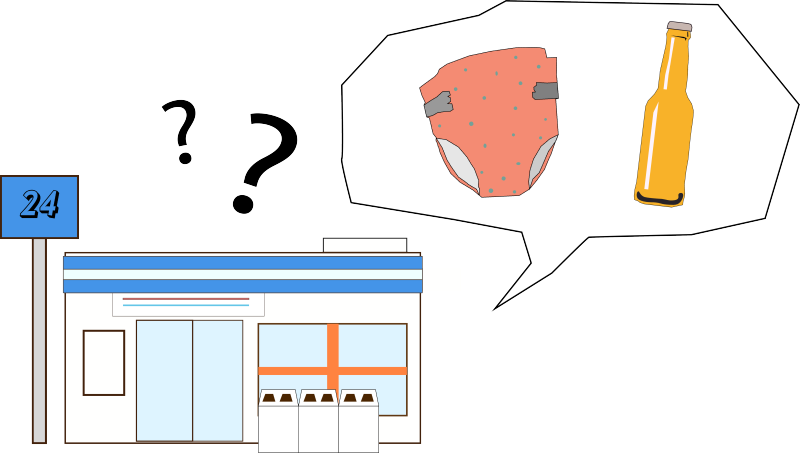
<br>

쉬운 예를 들어본다면, 어느 지역 편의점에서 저녁 6시부터 9시까지 아기용 기저귀와 맥주의 판매량이 늘어난다는 사실을 알게 되었습니다. 그 둘은 특별한 연관 관계가 없어 보였습니다. 하지만 과학적 분석을 해보기로 했습니다. 수천명의 데이터를 처리하면서 흥미로운 스토리를 발견하게 되었습니다. 왜, 누가, 저녁 6시부터 9시까지 아기용 기저귀와 맥주를 함께 사는가?<br><br>
 저녁에 퇴근하는 남편은 집에 가서 아기용 기저귀가 다 떨어져 가는 것을 알게 되었습니다. 부인은 남편에게 기저귀를 사오라고 시키게 됩니다. 하루종일 직장에서 업무에 시달린 남편은 편의점에서 기저귀를 사면서 맥주를 함께 사게 됩니다.<br><br>
 이런 사실을 알게 된 편의점에서는 어떤 행동을 취하게 될까요? 기저귀와 맥주를 함께 살 수 있도록 두 상품을 가까이 두게 될까요? 실제로 그 편의점에서는 이 두 상품을 가장 멀리 떨어져 있도록 배치합니다. 그러면 기저귀를 사러온 남편이 맥주를 사기 위해 가장 먼 거리를 이동하게 되고 그 사이에 다른 물건을 구매할 확률이 높아지게 됩니다.<br><br>
 이런 사실을 어떻게 편의점에서는 알게 되었을까요? 그러한 알고리즘중 하나가 apriori 알고리즘입니다.
 
- reference : https://m.blog.naver.com/healingview/221204445017 

# Apriori Algorithm Example

In [4]:
import numpy as np
import pandas as pd

In [5]:
dataset = [['아메리카노', '카페라떼'], ['카페라떼', '아메리카노', '카푸치노'], ['바닐라라떼', '아메리카노'],
['녹차라떼', '카페라떼', '아메리카노'],['녹차라떼', '투썸', '아메리카노'],['스벅', '투썸', '아메리카노'],
['카페모카', '아메리카노'],
['아메리카노', '카페라떼'],
['초콜릿', '아메리카노'], ['아메리카노'], ['카페모카', '카페라떼']]

In [6]:
import networkx as nx
from apyori import apriori
# 지지도는 P(A N B) 

result = list(apriori(dataset, min_support = 0.01))
df = pd.DataFrame(result)

df['length'] = df['items'].apply(lambda x: len(x))

df = df[(df['length'] == 2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)

df.head(10)

,items,support,ordered_statistics,length
16,"(카페라떼, 아메리카노)",0.363636,"[((), (카페라떼, 아메리카노), 0.36363636363636365, 1.0)...",2
9,"(녹차라떼, 아메리카노)",0.181818,"[((), (녹차라떼, 아메리카노), 0.18181818181818182, 1.0)...",2
19,"(아메리카노, 투썸)",0.181818,"[((), (아메리카노, 투썸), 0.18181818181818182, 1.0), ...",2
10,"(녹차라떼, 카페라떼)",0.090909,"[((), (녹차라떼, 카페라떼), 0.09090909090909091, 1.0),...",2
11,"(녹차라떼, 투썸)",0.090909,"[((), (녹차라떼, 투썸), 0.09090909090909091, 1.0), (...",2
12,"(아메리카노, 바닐라라떼)",0.090909,"[((), (아메리카노, 바닐라라떼), 0.09090909090909091, 1.0...",2
13,"(아메리카노, 스벅)",0.090909,"[((), (아메리카노, 스벅), 0.09090909090909091, 1.0), ...",2
14,"(스벅, 투썸)",0.090909,"[((), (스벅, 투썸), 0.09090909090909091, 1.0), ((스...",2
15,"(아메리카노, 초콜릿)",0.090909,"[((), (아메리카노, 초콜릿), 0.09090909090909091, 1.0),...",2
17,"(카페모카, 아메리카노)",0.090909,"[((), (카페모카, 아메리카노), 0.09090909090909091, 1.0)...",2


# Plus Network Example

In [7]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [8]:
# pagerank
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

pos = nx.planar_layout(G)

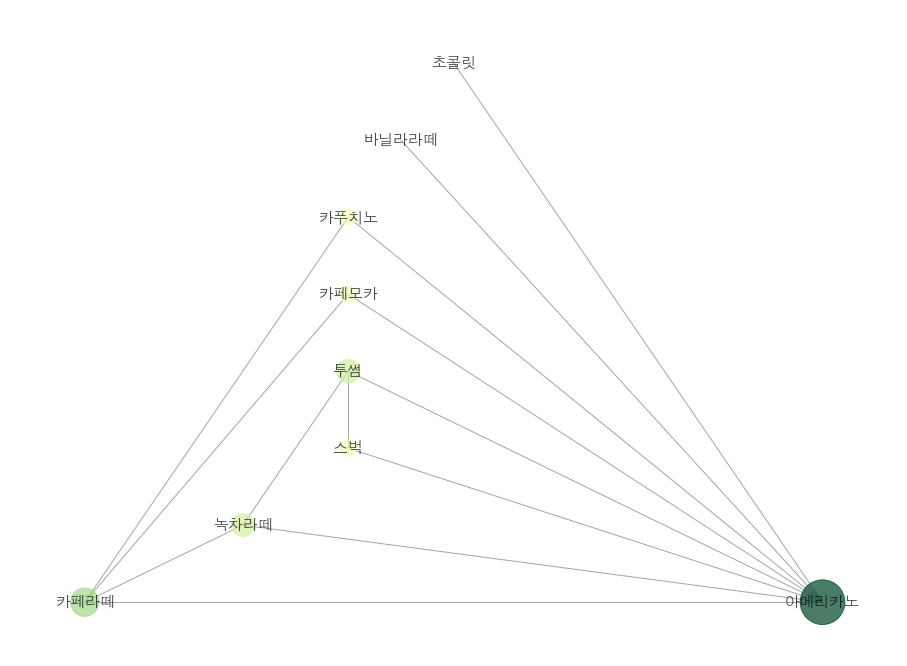

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rc
# 맥북 한글 글씨

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize= (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_size=15, pos=pos, font_family='AppleGothic',
                node_color=list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)

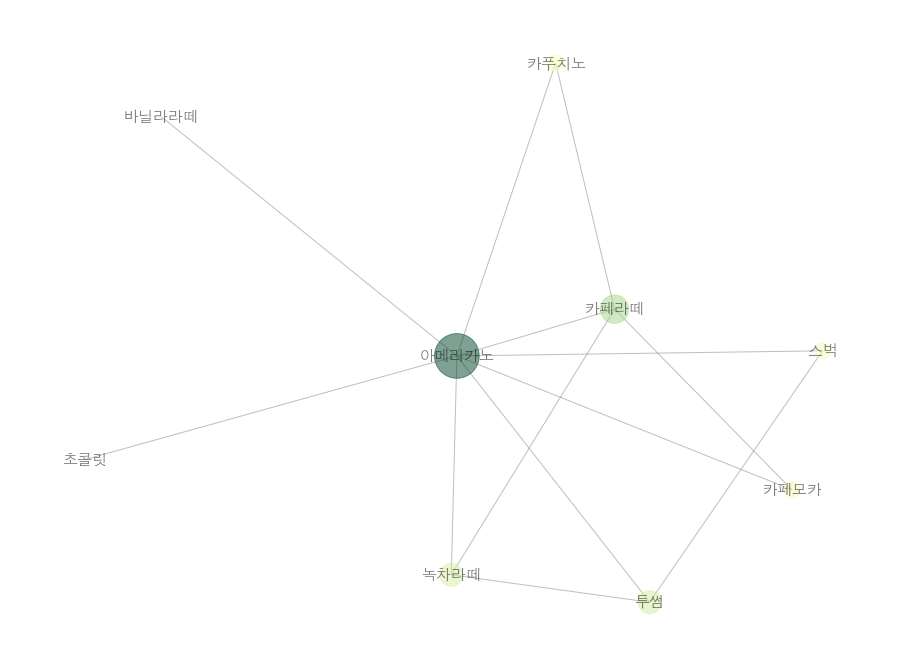

In [10]:
# pos = nx.circular_layout(G)

pos = nx.fruchterman_reingold_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.random_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.spring_layout(G)

plt.figure(figsize= (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_size=15, pos=pos, font_family='AppleGothic',
                node_color=list(pr.values()), node_size = nsize,
                alpha=0.5, edge_color='.5', cmap=plt.cm.YlGn)

# plt.savefig()